In [7]:
import json
from collections import Counter

exceptions = Counter()

with open("./data/models/20240402_sweagent_gpt4/preprocessed_instances.jsonl") as fp:
    count = 0
    for line in fp:
        i = json.loads(line)
        if "exception" in i:
            exceptions.update([i["exception"]])
            count += 1
print(count)
print(exceptions)

1284
Counter({'No overlap in files - not comparable.': 605, "Cmd('git') failed due to: exit code(128)\n  cmdline: git clone -v -c core.longpaths=true -- https://github.com/scikit-learn/scikit-learn experiments/repos/scikit-learn/scikit-learn\n  stderr: 'fatal: destination path 'experiments/repos/scikit-learn/scikit-learn' already exists and is not an empty directory.\n'": 229, "Cmd('git') failed due to: exit code(128)\n  cmdline: git clone -v -c core.longpaths=true -- https://github.com/sphinx-doc/sphinx experiments/repos/sphinx-doc/sphinx\n  stderr: 'fatal: destination path 'experiments/repos/sphinx-doc/sphinx' already exists and is not an empty directory.\n'": 187, "Cmd('git') failed due to: exit code(128)\n  cmdline: git clone -v -c core.longpaths=true -- https://github.com/matplotlib/matplotlib experiments/repos/matplotlib/matplotlib\n  stderr: 'fatal: destination path 'experiments/repos/matplotlib/matplotlib' already exists and is not an empty directory.\n'": 174, 'Null patch in i

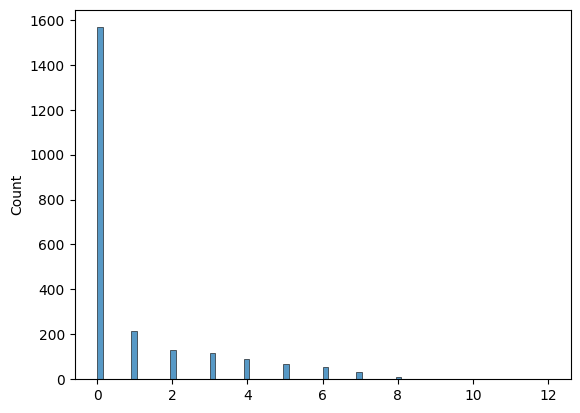

In [9]:
import os, json, seaborn
from collections import Counter

results: dict[str, dict] = {}
totalresults: dict[str, Counter] = {"seen": Counter()}
subfolders = [ f for f in os.scandir("./data/models") if f.is_dir() ]
for sf in subfolders:
    file = open(sf.path + "/results/results.json", "r")
    res = json.load(file)
    results[sf.name] = res
    for key in res:
        if key not in totalresults:
            totalresults[key] = Counter()
        totalresults[key].update(res[key])
        if key in ["generated", "no_generation"]:
            totalresults["seen"].update(res[key])

numresolved = {k: 0 for k in totalresults["seen"]}
numresolved.update(totalresults["resolved"])
hplot = seaborn.histplot(numresolved)
hplot.get_figure().savefig("figs/resolvedcount.png")